In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
data_dir = "data/"
mass_distr_file = data_dir+"NS_masses_2.dat"
plot_dir = "plots/"

In [3]:
# Plot NS mass distribution
# From http://xtreme.as.arizona.edu/NeutronStars/
colnames = ["mass", "minusErr", "plusErr", "category", "rank", "name"]
mass_distr = pd.read_csv(mass_distr_file, names=colnames, sep="\s+")

In [4]:
categories = list(mass_distr.category)
bounds = []
for cat in np.unique(categories):
    bounds.append(categories.index(cat))
    
masses = list(mass_distr.mass)
loErr = list(mass_distr.minusErr)
hiErr = list(mass_distr.plusErr)
space = 3
for i,bound in enumerate(bounds[1:]):
    for _ in range(space):
        masses.insert(i*space+bound, np.nan)
        loErr.insert(i*space+bound, np.nan)
        hiErr.insert(i*space+bound, np.nan)
ticks = [i*space+bound+1 for i,bound in enumerate(bounds[1:])]
bounds = ticks+[len(masses)]
labels = [bounds[i] - (bounds[i]-(bounds[i-1] if i!=0 else 0))/2 for i in range(len(bounds))]
#labels[0] -= 1
#labels = [-1] + labels

In [5]:
cats = list(np.unique(categories))
cat_names = ["Double neutron stars", "Recycled pulsars", "Bursters", "Slow pulsars"]

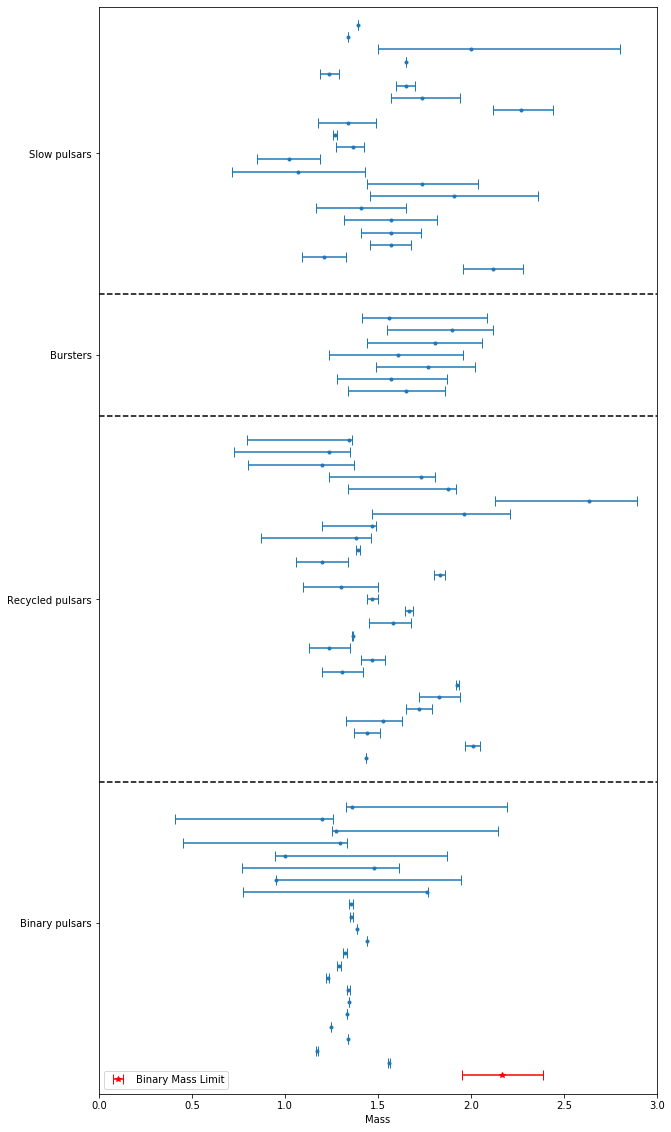

In [9]:
massErrs = np.zeros((2, len(masses)))
massErrs[0] = loErr
massErrs[1] = hiErr
fig, ax = plt.subplots(figsize=[10, 20])
ax.errorbar(masses, range(len(masses)), xerr=massErrs, capsize=5, fmt='.')
ax.errorbar(2.17, -1, xerr=0.217, fmt='r*', capsize=5, label="Binary Mass Limit")
for tick in ticks:
    ax.plot([0, 3], [tick, tick], 'k--')
ax.set_xlim([0, 3])
ax.set_ylim([-2.5, len(masses)+.5])
ax.set_yticks(labels)
ax.set_yticklabels(cat_names)
ax.set_xlabel("Mass")
#ax.fill_between(x=[0.9*2.17, 1.1*2.17], y1=[-2, -2], y2=[bounds[0], bounds[0]], color='r', alpha=0.2)
#ax.plot([2.17, 2.17], [-2, bounds[0]], color='r', alpha=0.8, label="Binary mass limit")
ax.legend(loc="lower left")

plt.savefig(plot_dir+"mass_distr.png", bbox_inches='tight')

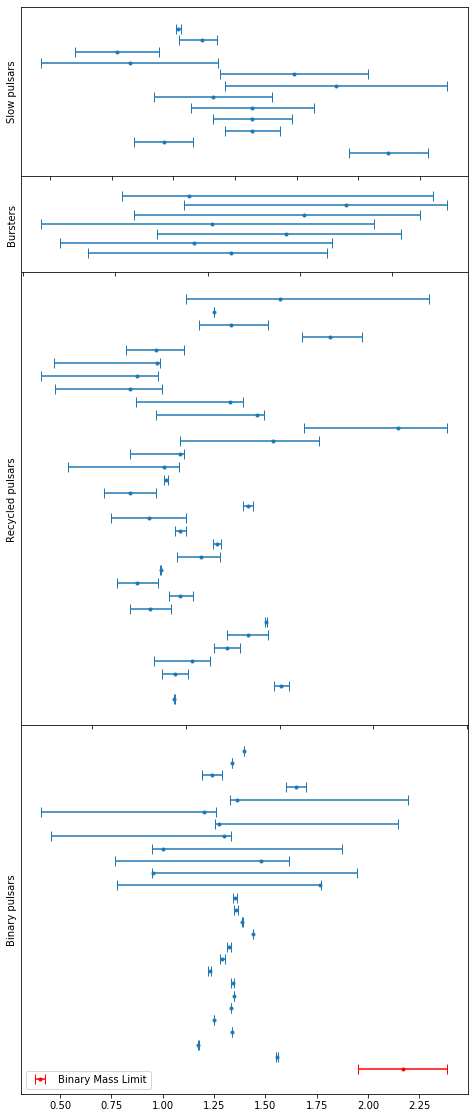

In [67]:
fig, ax = plt.subplots(figsize=[8, 20])
divider = make_axes_locatable(ax)
slice0 = mass_distr[mass_distr['category']==cats[0]]
#ax2 = divider.new_vertical(size="200%", pad=0.1)
#fig.add_axes(ax2)

#ax3 = divider.new_vertical(size="50%", pad=0.1)
#fig.add_axes(ax3)
axes = []
for i,cat in enumerate(cats):
    # format data
    mass_slice = mass_distr[mass_distr['category']==cat]
    massErrs = np.zeros((2, len(mass_slice)))
    massErrs[0] = mass_slice['minusErr']
    massErrs[1] = mass_slice['plusErr']
    
    if i!=0:
        # find relative size of subplot
        plotstring = str(int(100*len(mass_slice)/len(slice0)))+"%"
        
        # add new subplot
        ax = divider.new_vertical(size=plotstring, pad=0.01)
        fig.add_axes(ax)
        ax.set_xticklabels([])
        lim = -2
    else:
        lim = -3
    
    # plot data
    ax.errorbar(mass_slice['mass'], range(len(mass_slice)), xerr=massErrs, capsize=5, fmt='.')
    ax.set_ylim([lim, len(mass_slice)+1])
    
    # format
    ax.set_ylabel(cat_names[i])
    ax.set_yticks([])
    if i!=len(cats)-1:
        ax.spines['top'].set_visible(False)
    
    axes.append(ax)

axes[0].errorbar(2.17, -1, xerr=.217, color='r', label="DNS Mass Limit", capsize=5, fmt='.')
axes[0].legend(loc="lower left")

plt.savefig(plot_dir+"mass_distr_2.png")

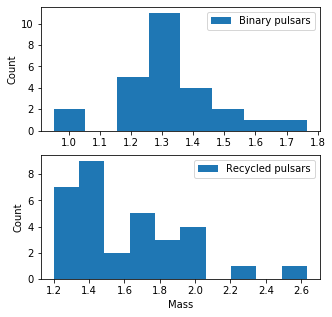

In [106]:
htype = 'bar'
nbins = 10
fig, ax = plt.subplots(len(cats[:2]), 1, figsize=[5, 5])
ranges = mass_distr.plusErr + mass_distr.minusErr
mass_distr['range'] = ranges

for i,cat in enumerate(cats[:2]):
    mass_slice = mass_distr[mass_distr.category==cat]
    nbins = int(len(mass_slice)/3.0)
    n, bins, _ = ax[i].hist(mass_slice.mass, bins=nbins, label=cat_names[i])
    
    ax[i].set_ylabel("Count")
    ax[i].legend()
    
plt.xlabel("Mass")
plt.legend()
plt.savefig(plot_dir+"mass_hist.png", bbox_inches="tight")

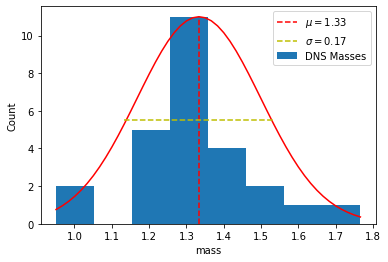

In [160]:
# Get DNS hist data
dn_mass = mass_distr[mass_distr.category==1].mass
n, bins, _ = plt.hist(dn_mass, bins=8, label="DNS Masses")

mu = np.mean(dn_mass)
sig = np.std(dn_mass)

x = np.linspace(min(bins), max(bins), 50)
g_fit = 1/sig * np.exp(-0.5 * ((x-mu)/sig)**2)
g_fit = g_fit/max(g_fit) * max(n)
plt.plot(x, g_fit, 'r')

plt.plot([mu, mu], [0, max(g_fit)], 'r--', label=f"$\mu={mu:.2f}$")
mid = int(len(g_fit)/2)
left_g = g_fit[:mid]
right_g = g_fit[mid:]
fwhm_min = np.argmin(np.abs(left_g-max(g_fit)/2))
fwhm_max = np.argmin(np.abs(right_g-max(g_fit)/2))+mid
plt.plot([x[fwhm_min], x[fwhm_max]], [max(g_fit)/2, max(g_fit)/2], 'y--', label=f"$\sigma={sig:.2f}$")

plt.legend()
plt.xlabel("mass")
plt.ylabel("Count")

plt.savefig(plot_dir+"DNS_fit.png")

In [146]:
np.abs(left_g - max(g_fit)/2)

array([4.74006828, 4.54617381, 4.31483425, 4.04217925, 3.72481206,
       3.36006918, 2.94629747, 2.48313372, 1.97176912, 1.41517823,
       0.81829109, 0.18808784, 0.46640241, 1.13421252, 1.80266532,
       2.45771894, 3.08442035, 3.66744969, 4.19172931, 4.64306472,
       5.00877994, 5.27830775, 5.44369655, 5.5       , 5.44552277])